## Two neuron example

In [27]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


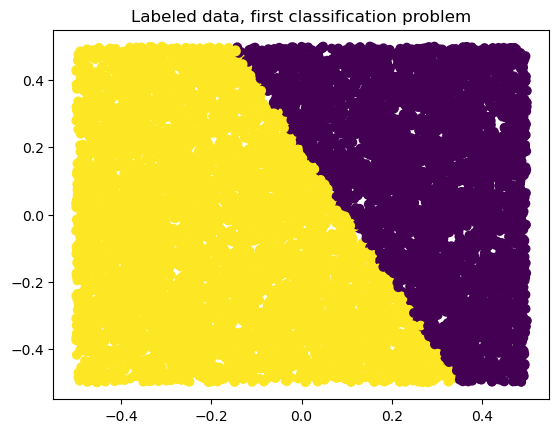

In [28]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classification problem')
plt.show()

#### a) Do you expect that a single neuron will be able to accurately classify data from case 1? Why or why not? Explain the impact of the bias term associated with w1,0.

Yes, a single neuron can create a linear function which can accurately classify data from case 1 with a simple line. With the constant and its weight, we can decide how far our boundary will be close to the origin.

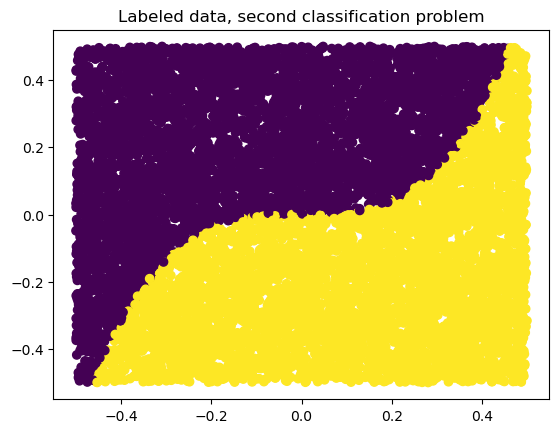

In [29]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classification problem')
plt.show()

#### b) Do you expect that a single neuron will be able to accurately classify data from case 2? Why or why not? Explain the impact of the bias term associated with w2,0.

No, a single neuron cannot create a curve to accuarately classify case 2 data. With the constant and its weight, we can decide how far our boundary will be close to the origin.

In [30]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
# L = 10 #number of epochs
# L = 5
L = 20

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat = logsig(Xb[[i],:]@W) 
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Wnew = W - alpha*Xb[[i],:].T@delta
        W = Wnew
    print('epoch: ', epoch)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19


In [31]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

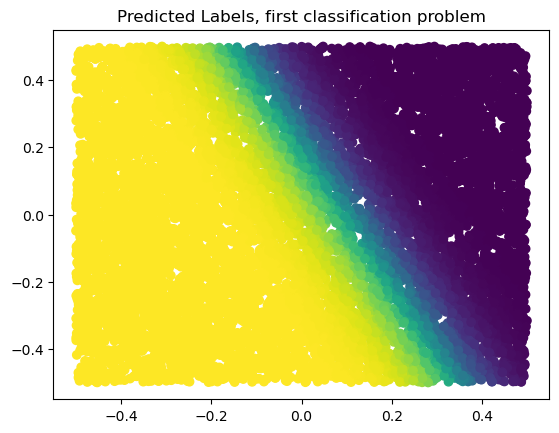

In [32]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classification problem')
plt.show()

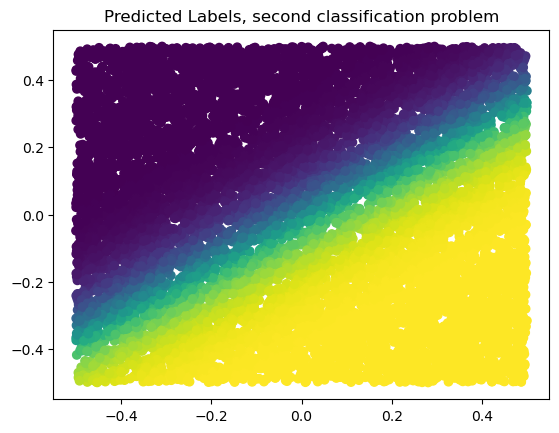

In [33]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classification problem')
plt.show()

In [34]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classification problem:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classification problem:', err_c2)

Errors, first classification problem: 64.0
Errors, second classification problem: 728.0


#### c) Run SGD for one epoch. This means you cycle through all the training data one time, in random order. Repeat this ﬁve times and ﬁnd the average number of errors in cases 1 and 2.

first classification problem Errors: 53.0
 second classification proble Errorsm: 772.0

#### d) Run SGD over twenty epochs. This means you cycle through all the training data twenty times, in random order. Repeat this ﬁve times and ﬁnd the average number of errors in cases 1 and 2.

first classification problem Errors: 64.0second classification problem Errors: 728.0

#### e) Explain the diﬀerences in classiﬁcation performance for the two cases that result with both one and twenty epochs.